In [1]:
import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_GER_Bank.csv")
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_to_income,gender_marital,other_debtors,...,property,age,other_installment_plans,housing,nb_of_existing_credits,job,nb_dependants,telephone,foreing_worker,default
0,... < 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,no checking account,12,critical account/other credits existing (not a...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


We can notice that we don't have Nan but we have 'none', we replace it on Nan

In [3]:
df.replace({'none': None}, inplace=True)
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_to_income,gender_marital,other_debtors,...,property,age,other_installment_plans,housing,nb_of_existing_credits,job,nb_dependants,telephone,foreing_worker,default
0,... < 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/no savings account,.. >= 7 years,4,male : single,None,...,real estate,67,None,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,None,...,real estate,22,None,own,1,skilled employee / official,1,None,yes,1
2,no checking account,12,critical account/other credits existing (not a...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,None,...,real estate,49,None,own,1,unskilled - resident,2,None,yes,0
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,None,for free,1,skilled employee / official,2,None,yes,0
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,None,...,unknown / no property,53,None,for free,2,skilled employee / official,2,None,yes,1


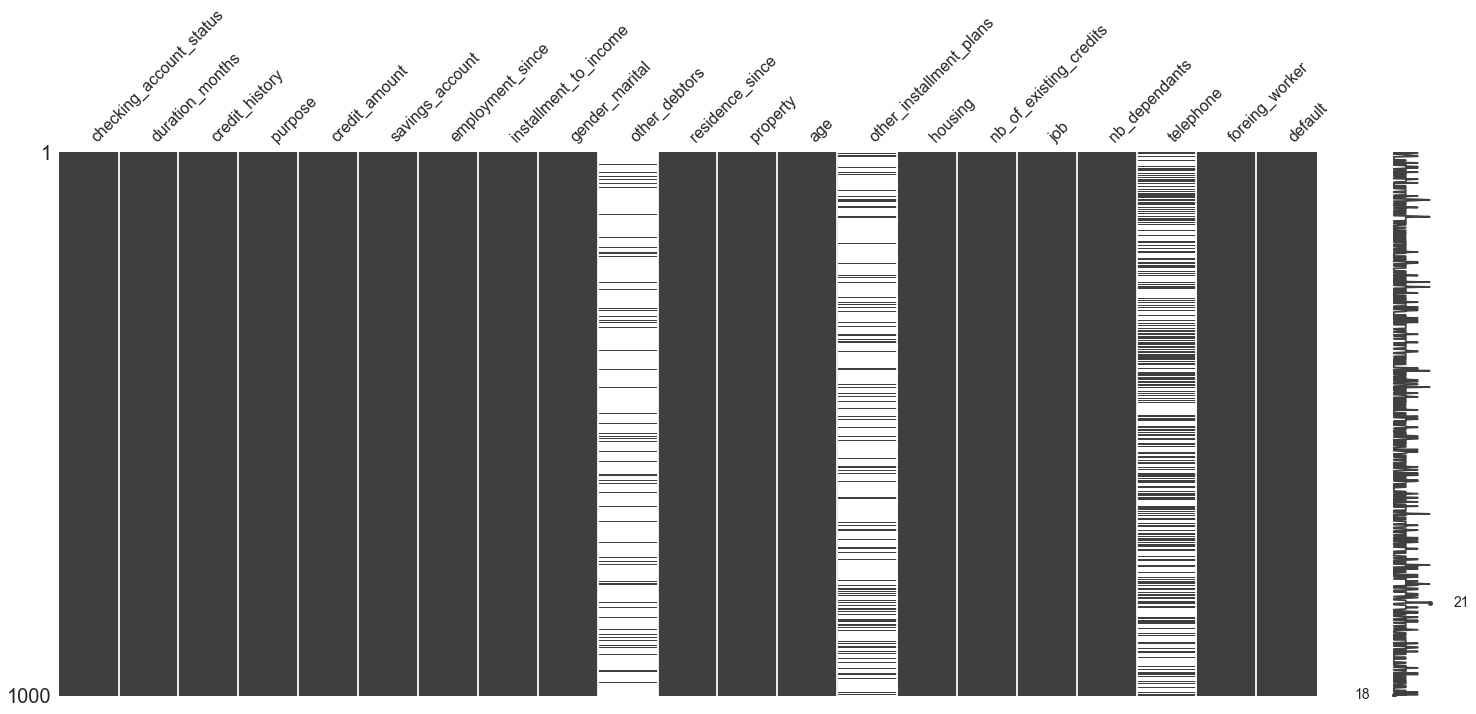

In [4]:
utils.plot_missing_values(df, 'default')

From plot above we can remove 'other_debtors' and 'other_installment_plans', 'telephone' - as they have a lot missing values
Also drop duplicates


In [5]:
df.drop(columns=['other_debtors', 'other_installment_plans', 'telephone'], inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()

checking_account_status    0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment_since           0
installment_to_income      0
gender_marital             0
residence_since            0
property                   0
age                        0
housing                    0
nb_of_existing_credits     0
job                        0
nb_dependants              0
foreing_worker             0
default                    0
dtype: int64

In [6]:
df.columns

Index(['checking_account_status', 'duration_months', 'credit_history',
       'purpose', 'credit_amount', 'savings_account', 'employment_since',
       'installment_to_income', 'gender_marital', 'residence_since',
       'property', 'age', 'housing', 'nb_of_existing_credits', 'job',
       'nb_dependants', 'foreing_worker', 'default'],
      dtype='object')

In [7]:
df.nunique()

checking_account_status      4
duration_months             33
credit_history               5
purpose                     10
credit_amount              921
savings_account              5
employment_since             5
installment_to_income        4
gender_marital               4
residence_since              4
property                     4
age                         53
housing                      3
nb_of_existing_credits       4
job                          4
nb_dependants                2
foreing_worker               2
default                      2
dtype: int64

In [8]:
# due to nb_dependants for example has only 2 variants, should it be category? or leave number? because we have more than 1 or 2
num_features = ['duration_months', 'credit_amount',
       'installment_to_income', 'age', 'nb_of_existing_credits', 'nb_dependants']
cat_features = ['checking_account_status',  'credit_history',
       'purpose', 'savings_account', 'employment_since', 'gender_marital',
       'residence_since', 'property',
       'housing', 'job', 'foreing_worker'] 
target = 'default'             

In [9]:
df[cat_features] = df[cat_features].apply(lambda c: c.astype('category'))
df['default'] = df['default'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account_status  1000 non-null   category
 1   duration_months          1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   credit_amount            1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_since         1000 non-null   category
 7   installment_to_income    1000 non-null   int64   
 8   gender_marital           1000 non-null   category
 9   residence_since          1000 non-null   category
 10  property                 1000 non-null   category
 11  age                      1000 non-null   int64   
 12  housing                  1000 non-null   category
 13  nb_of_existing_credits   1000 non-null   int64   
 14  job      

In [11]:
df.describe()

,duration_months,credit_amount,installment_to_income,age,nb_of_existing_credits,nb_dependants
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


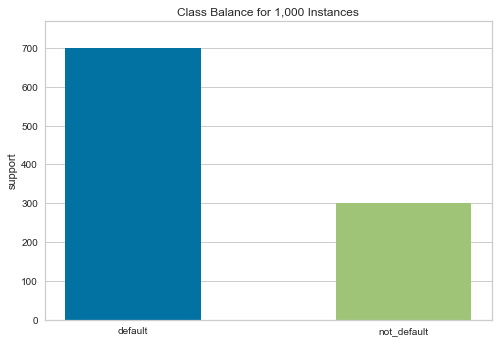

In [12]:
utils.display_target_balance(df, 'default', ['default', 'not_default'])
# imbalance class  - oversample, undersample, if we use tree - > not needed balance classes? use k-fold can help

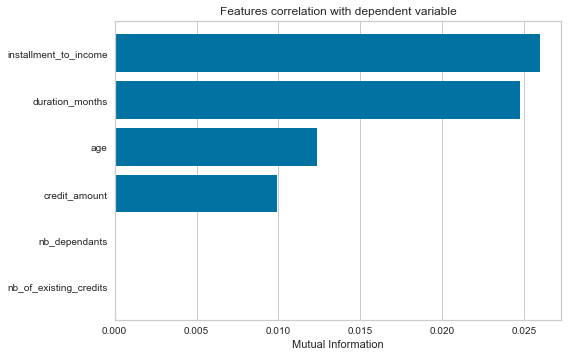

In [13]:
utils.display_feature_corr(df, 'default', num_features)

<AxesSubplot:>

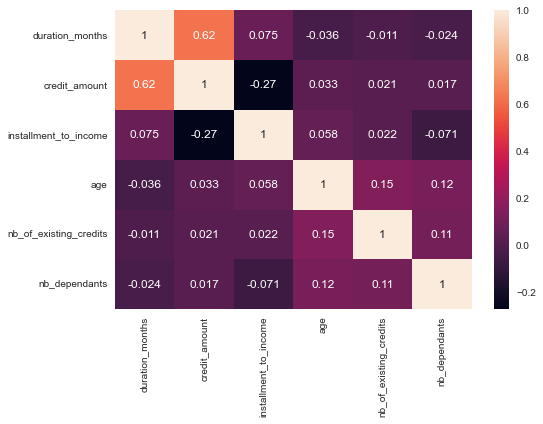

In [14]:
sns.heatmap(df.corr(), annot=True)
# should I remove one of the variables: 'duration_months' or 'credit_amount'

<AxesSubplot:>

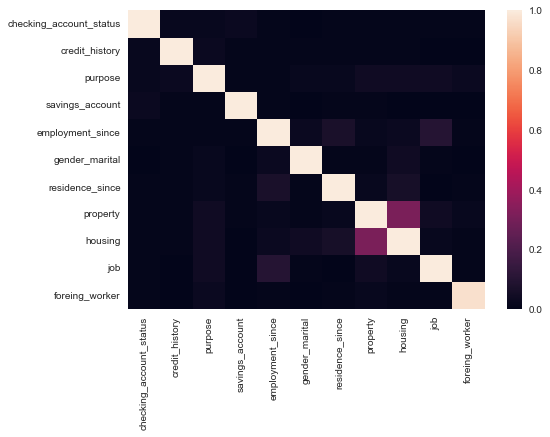

In [15]:
sns.heatmap(utils.corr_mtx_cat_features(df[cat_features]))

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb


base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("CAT_boost", CatBoostClassifier(iterations=5, learning_rate=0.1)),
               ("XGB_model", xgb.XGBClassifier(random_state=42, n_jobs=-1))]
X = df.loc[:, df.columns != target]
y = df[target]
kfolds = 4
scoring = 'accuracy'

utils.run_models(base_models, cat_features, num_features, X, y, scoring, kfolds)

DT_model cross validation score: 0.69 +/- 0.0269 (std) min: 0.656, max: 0.728
RF_model cross validation score: 0.759 +/- 0.0052 (std) min: 0.752, max: 0.764
0:	learn: 0.6729164	total: 51.7ms	remaining: 207ms
0:	learn: 0.6758460	total: 51.8ms	remaining: 207ms
1:	learn: 0.6536510	total: 52.3ms	remaining: 78.5ms
1:	learn: 0.6588649	total: 52.5ms	remaining: 78.8ms
2:	learn: 0.6369610	total: 52.9ms	remaining: 35.3ms
2:	learn: 0.6419843	total: 53.2ms	remaining: 35.5ms
3:	learn: 0.6228109	total: 53.5ms	remaining: 13.4ms
3:	learn: 0.6259912	total: 53.7ms	remaining: 13.4ms
4:	learn: 0.6112083	total: 54ms	remaining: 0us
4:	learn: 0.6129242	total: 54.3ms	remaining: 0us
0:	learn: 0.6715001	total: 55.5ms	remaining: 222ms
1:	learn: 0.6520066	total: 56.1ms	remaining: 84.2ms
2:	learn: 0.6343640	total: 56.7ms	remaining: 37.8ms
3:	learn: 0.6185012	total: 57.1ms	remaining: 14.3ms
4:	learn: 0.6061071	total: 57.6ms	remaining: 0us
0:	learn: 0.6743350	total: 58ms	remaining: 232ms
1:	learn: 0.6553231	total: 5

({'DT_model': 0.69, 'RF_model': 0.759, 'CAT_boost': 0.708, 'XGB_model': 0.742},
 {'DT_model': 0.728, 'RF_model': 0.764, 'CAT_boost': 0.72, 'XGB_model': 0.784},
 {'DT_model': 0.656, 'RF_model': 0.752, 'CAT_boost': 0.692, 'XGB_model': 0.72},
 {'DT_model': 0.0269,
  'RF_model': 0.0052,
  'CAT_boost': 0.0123,
  'XGB_model': 0.0247})

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[20:31:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8; total time=   0.0s
[20:31:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8; total time=   0.0s
[20:31:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



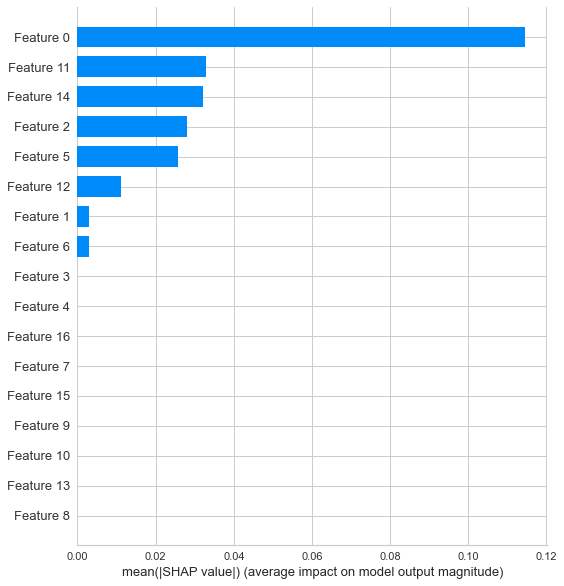

In [17]:
model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
preprocessor = utils.provide_column_transformer(cat_features, num_features) 
X_encoded = preprocessor.fit_transform(X)               

utils.tune_model(X_encoded, y, model, parameters, scoring)
